# 01. PyTorch Workflow Exercises

In [772]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

## 1. Create a straight line dataset using the linear regression formula (weight * X + bias).

In [773]:
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
weight = 0.3
bias = 0.9

start = 0
end = 100
step = 0.1
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10].squeeze(), y[:10].squeeze()

(tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000]),
 tensor([0.9000, 0.9300, 0.9600, 0.9900, 1.0200, 1.0500, 1.0800, 1.1100, 1.1400,
         1.1700]))

In [774]:
# Split the data into 80% training, 20% testing.
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [775]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
	plt.figure(figsize=(10,7))
	
	# Plot training data in blue
	plt.scatter(train_data, train_labels, c = "b", s=5, label="training data") 
	
	# Plot test data in green
	plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
	
	# Are there predictions?
	if predictions is not None:
		# Plot the predictions if they exist
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
		
	# SHow the legend
	plt.legend(prop={"size":14})

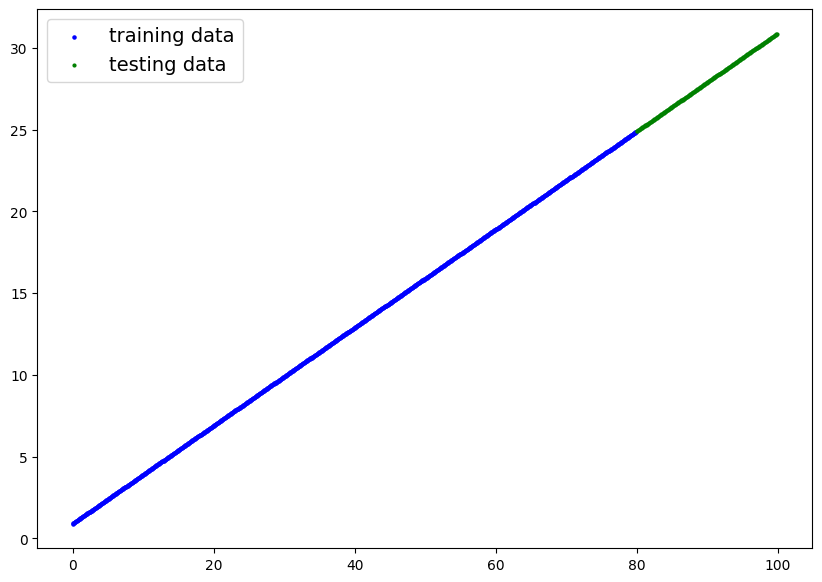

In [776]:
plot_predictions()

## 2. Build a PyTorch model by subclassing nn.Module.

In [777]:
class LinearRegressionModel(nn.Module):
	# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
	def __init__(self):
		super().__init__()
		self.weight = nn.Parameter(torch.randn(1,
											   requires_grad=True,
											   dtype=torch.float))
		self.bias = nn.Parameter(torch.randn(1,
									   		requires_grad=True,
											dtype=torch.float))
	
	# Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
	def forward(self, x: torch.Tensor) -> torch.Tensor:
		return self.weight * x + self.bias

#Once you've constructed the model, make an instance of it and check its state_dict().
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [778]:
# Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
torch.manual_seed(42)
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

In [779]:
# Write a training loop to perform the appropriate training steps for 300 epochs.
epochs = 1000
epochs_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
	model.train()

	# 1. Do the forward pass
	y_pred = model(X_train)
	# 2. Calculate the loss
	train_loss = loss_function(y_pred, y_train)

	# 3. Zero the optimizer gradients
	optimizer.zero_grad()

	# 4. Backward pass and optimize
	train_loss.backward()

	# 5. Update the model parameters using the optimizer
	optimizer.step()

	### Test Time!
	# Set the model to eval mode
	model.eval()
	with torch.inference_mode():
		# 1. Dot the forward pass
		test_pred = model(X_test)

		# 2. Calculate the loss
		test_loss = loss_function(test_pred, y_test)

	if epoch % 20 == 0:
		epochs_count.append(epoch)
		train_loss_values.append(train_loss.item())
		test_loss_values.append(test_loss)
		print(f"Epochs: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}")

Epochs: 0 | Train loss: 0.8981733918190002 | Test loss: 0.566657543182373
Epochs: 20 | Train loss: 1.2408037185668945 | Test loss: 0.10738372802734375
Epochs: 40 | Train loss: 0.834729015827179 | Test loss: 0.6918766498565674
Epochs: 60 | Train loss: 0.9063652157783508 | Test loss: 0.5672118067741394
Epochs: 80 | Train loss: 1.2600128650665283 | Test loss: 0.13423626124858856
Epochs: 100 | Train loss: 1.3552453517913818 | Test loss: 0.3328929841518402
Epochs: 120 | Train loss: 0.7471551299095154 | Test loss: 0.8581490516662598
Epochs: 140 | Train loss: 1.1215139627456665 | Test loss: 0.16401706635951996
Epochs: 160 | Train loss: 0.9719177484512329 | Test loss: 0.46743300557136536
Epochs: 180 | Train loss: 1.3399574756622314 | Test loss: 0.28407251834869385
Epochs: 200 | Train loss: 1.3352137804031372 | Test loss: 0.27041760087013245
Epochs: 220 | Train loss: 1.332536220550537 | Test loss: 0.2583891749382019
Epochs: 240 | Train loss: 1.330077052116394 | Test loss: 0.2503014802932739
Epo

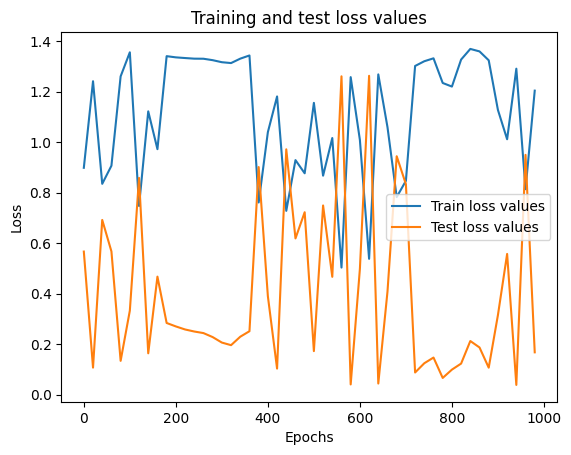

In [780]:
plt.figure()
plt.plot(epochs_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss values")
plt.plot(epochs_count, test_loss_values, label="Test loss values")
plt.title("Training and test loss values")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [781]:
print(model.state_dict())
print(f"Desired values: {weight} & {bias}")

OrderedDict({'weight': tensor([0.3274]), 'bias': tensor([0.3210])})
Desired values: 0.3 & 0.9


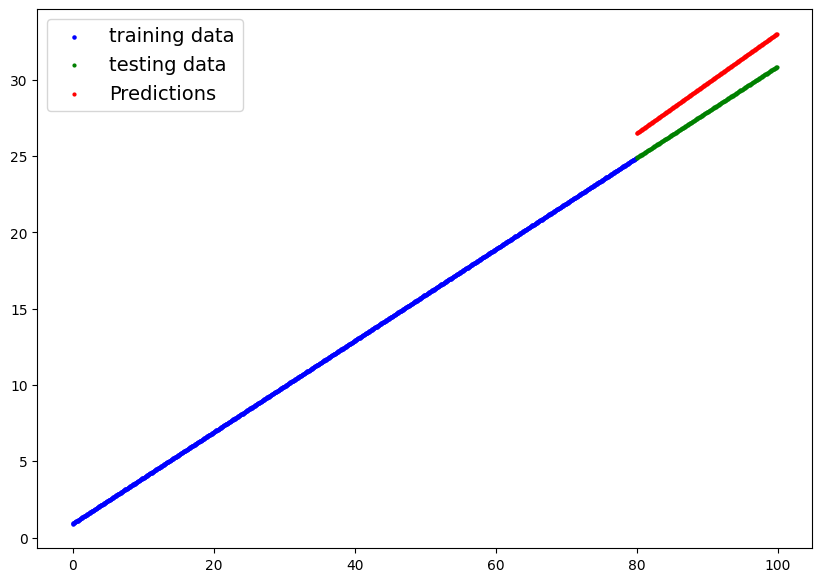

In [782]:
with torch.inference_mode():
    y_preds_new = model(X_test)
    
plot_predictions(predictions=y_preds_new)